# Dask Demo Day: Dask Applications in Astronomy with LINCC Frameworks

Author: Doug Branton

Date: 9/5/24

## Briefly Introducing LINCC Frameworks
https://lsstdiscoveryalliance.org/programs/lincc-frameworks/

The LINCC Frameworks project, supported by Schmidt Sciences, is focused on developing scalable software within the field of Astronomy. In particular, the upcoming Rubin Observatory Legacy Survey of Space and Time (Rubin LSST) will provide a ~20PB processed dataset for the community. This introduces a new computational demand to many scientists workflows, where powerful and approachable tooling is needed to enable scientific work.

We have two projects that have leveraged Dask for this; the Large Survey DataBase (LSDB) and Nested-Dask.

## LSDB: A Framework for Spatial Analysis of Extremely Large Astronomical Surveys

In [1]:
import lsdb

lsdb.__version__

'0.3.0'

We start by loading an example dataset into an LSDB "Catalog", which is built on top of Dask's DataFrame class.

In [2]:
%%time
# Read the Zwicky Transient Facility "object" catalog into an LSDB catalog
ztf_object = lsdb.read_hipscat('https://data.lsdb.io/unstable/ztf/ztf_dr14/')

ztf_object

CPU times: user 260 ms, sys: 64 ms, total: 324 ms
Wall time: 1.7 s


,ps1_objid,ra,dec,ps1_gMeanPSFMag,ps1_rMeanPSFMag,ps1_iMeanPSFMag,nobs_g,nobs_r,nobs_i,mean_mag_g,mean_mag_r,mean_mag_i,Norder,Dir,Npix
npartitions=2352,,,,,,,,,,,,,,,
0,int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow]
18014398509481984,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13830554455654793216,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18446744073709551615,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


LSDB is built upon a special partitioning structure called "HiPSCat", which defines hierarchical pixels spatially on the sky (a sphere). Each pixel is designed to contain roughly the same amount of data, with size determined by the density of objects in a given region of the sky. We see below that there's an arch of higher density (more data, more partitions), which is everything within the Milky Way Galaxy.

CPU times: user 1 μs, sys: 1e+03 ns, total: 2 μs
Wall time: 3.1 μs


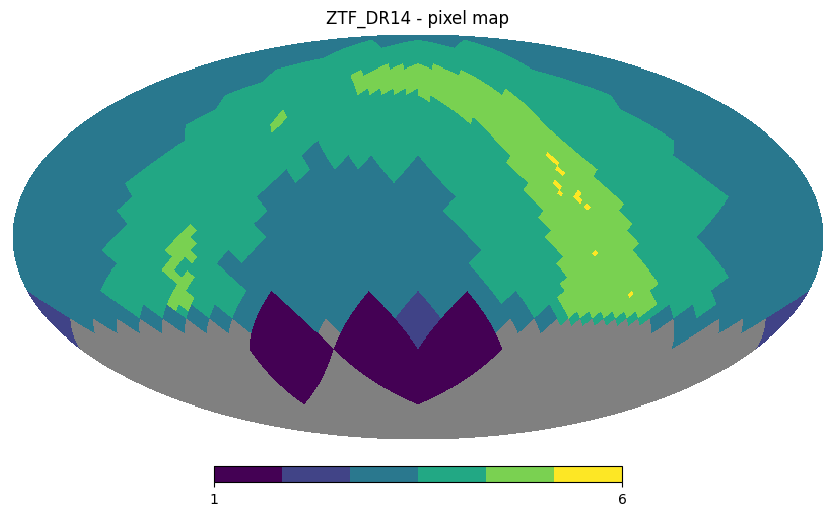

In [3]:
%time
ztf_object.plot_pixels("ZTF_DR14 - pixel map")

LSDB is focused on large-scale analytics, including spatial filtering, data analysis, and cross-matching (where objects in multiple surveys are matched together).

,ps1_objid,ra,dec,ps1_gMeanPSFMag,ps1_rMeanPSFMag,ps1_iMeanPSFMag,nobs_g,nobs_r,nobs_i,mean_mag_g,mean_mag_r,mean_mag_i,Norder,Dir,Npix
npartitions=2,,,,,,,,,,,,,,,
6674334647763075072,int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow]
6773413839565225984,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18446744073709551615,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


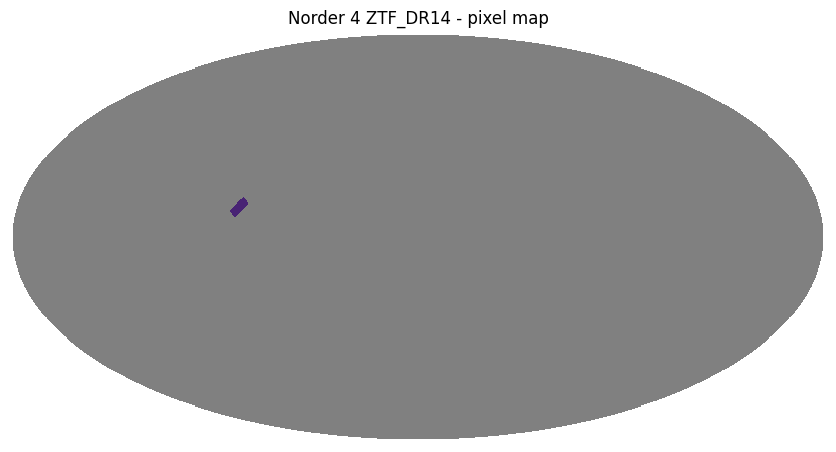

In [4]:
# Read in a smaller slice of ZTF, defining a conesearch area
from lsdb.core.search import ConeSearch
search_area = ConeSearch(ra=80, dec=10, radius_arcsec=0.5 * 3600)

# This searching is done pre-dask, meaning we avoid submitting a task graph with a very large first layer for a small chunk of a large catalog

ztf_object = lsdb.read_hipscat('https://data.lsdb.io/unstable/ztf/ztf_dr14/',
                              search_filter=search_area)

ztf_object.plot_pixels("ZTF_DR14 - pixel map")
ztf_object

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,Norder,Dir,Npix
npartitions=2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6674334647763075072,int64[pyarrow],string[pyarrow],int64[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],int64[pyarrow],int64[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],bool[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],int64[pyarrow],double[pyarrow],int64[pyarrow],int64[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],bool[pyarrow],int64[pyarrow],double[pyarr

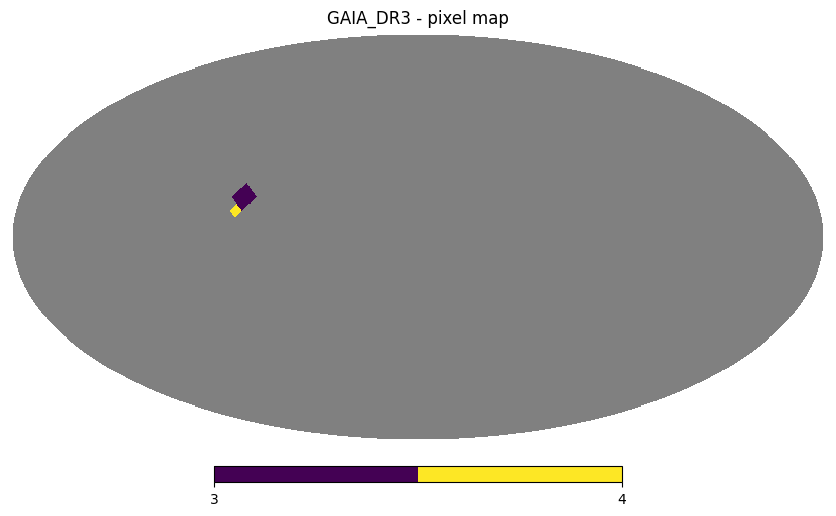

In [5]:
# And pull in another survey, Gaia

gaia_object = lsdb.read_hipscat('https://data.lsdb.io/unstable/gaia_dr3/gaia/',
                              search_filter=search_area)

gaia_object.plot_pixels("GAIA_DR3 - pixel map")
gaia_object

We can cross-match ZTF and Gaia, using the `crossmatch` function. This will match objects in both catalogs spatially.

In [6]:
%%time
# Cross-match our small slice of ZTF with Gaia
xmatched = ztf_object.crossmatch(
    gaia_object,
    # Up to 1 arcsec distance, it is the default
    radius_arcsec=1.0,
    # Single closest object, it is the default
    n_neighbors=1,
    # Default would be to use names of the HiPSCat catalogs
    suffixes=("_ztf", "_gaia"),
)

xmatched

/Users/dbranton/lincc/lsdb/src/lsdb/dask/crossmatch_catalog_data.py:108: RuntimeWarning: Right catalog does not have a margin cache. Results may be incomplete and/or inaccurate.
  warnings.warn(


CPU times: user 567 ms, sys: 4.78 ms, total: 571 ms
Wall time: 269 ms


,ps1_objid_ztf,ra_ztf,dec_ztf,ps1_gMeanPSFMag_ztf,ps1_rMeanPSFMag_ztf,ps1_iMeanPSFMag_ztf,nobs_g_ztf,nobs_r_ztf,nobs_i_ztf,mean_mag_g_ztf,mean_mag_r_ztf,mean_mag_i_ztf,Norder_ztf,Dir_ztf,Npix_ztf,solution_id_gaia,designation_gaia,source_id_gaia,random_index_gaia,ref_epoch_gaia,ra_gaia,ra_error_gaia,dec_gaia,dec_error_gaia,parallax_gaia,parallax_error_gaia,parallax_over_error_gaia,pm_gaia,pmra_gaia,pmra_error_gaia,pmdec_gaia,pmdec_error_gaia,ra_dec_corr_gaia,ra_parallax_corr_gaia,ra_pmra_corr_gaia,ra_pmdec_corr_gaia,dec_parallax_corr_gaia,dec_pmra_corr_gaia,dec_pmdec_corr_gaia,parallax_pmra_corr_gaia,parallax_pmdec_corr_gaia,pmra_pmdec_corr_gaia,astrometric_n_obs_al_gaia,astrometric_n_obs_ac_gaia,astrometric_n_good_obs_al_gaia,astrometric_n_bad_obs_al_gaia,astrometric_gof_al_gaia,astrometric_chi2_al_gaia,astrometric_excess_noise_gaia,astrometric_excess_noise_sig_gaia,astrometric_params_solved_gaia,astrometric_primary_flag_gaia,nu_eff_used_in_astrometry_gaia,pseudocolour_gaia,pseudocolour_error_gaia,ra_pseudocolour_corr_gaia,dec_pseudocolour_corr_gaia,parallax_pseudocolour_corr_gaia,pmra_pseudocolour_corr_gaia,pmdec_pseudocolour_corr_gaia,astrometric_matched_transits_gaia,visibility_periods_used_gaia,astrometric_sigma5d_max_gaia,matched_transits_gaia,new_matched_transits_gaia,matched_transits_removed_gaia,ipd_gof_harmonic_amplitude_gaia,ipd_gof_harmonic_phase_gaia,ipd_frac_multi_peak_gaia,ipd_frac_odd_win_gaia,ruwe_gaia,scan_direction_strength_k1_gaia,scan_direction_strength_k2_gaia,scan_direction_strength_k3_gaia,scan_direction_strength_k4_gaia,scan_direction_mean_k1_gaia,scan_direction_mean_k2_gaia,scan_direction_mean_k3_gaia,scan_direction_mean_k4_gaia,duplicated_source_gaia,phot_g_n_obs_gaia,phot_g_mean_flux_gaia,phot_g_mean_flux_error_gaia,phot_g_mean_flux_over_error_gaia,phot_g_mean_mag_gaia,phot_bp_n_obs_gaia,phot_bp_mean_flux_gaia,phot_bp_mean_flux_error_gaia,phot_bp_mean_flux_over_error_gaia,phot_bp_mean_mag_gaia,phot_rp_n_obs_gaia,phot_rp_mean_flux_gaia,phot_rp_mean_flux_error_gaia,phot_rp_mean_flux_over_error_gaia,phot_rp_mean_mag_gaia,phot_bp_rp_excess_factor_gaia,phot_bp_n_contaminated_transits_gaia,phot_bp_n_blended_transits_gaia,phot_rp_n_contaminated_transits_gaia,phot_rp_n_blended_transits_gaia,phot_proc_mode_gaia,bp_rp_gaia,bp_g_gaia,g_rp_gaia,radial_velocity_gaia,radial_velocity_error_gaia,rv_method_used_gaia,rv_nb_transits_gaia,rv_nb_deblended_transits_gaia,rv_visibility_periods_used_gaia,rv_expected_sig_to_noise_gaia,rv_renormalised_gof_gaia,rv_chisq_pvalue_gaia,rv_time_duration_gaia,rv_amplitude_robust_gaia,rv_template_teff_gaia,rv_template_logg_gaia,rv_template_fe_h_gaia,rv_atm_param_origin_gaia,vbroad_gaia,vbroad_error_gaia,vbroad_nb_transits_gaia,grvs_mag_gaia,grvs_mag_error_gaia,grvs_mag_nb_transits_gaia,rvs_spec_sig_to_noise_gaia,phot_variable_flag_gaia,l_gaia,b_gaia,ecl_lon_gaia,ecl_lat_gaia,in_qso_candidates_gaia,in_galaxy_candidates_gaia,non_single_star_gaia,has_xp_continuous_gaia,has_xp_sampled_gaia,has_rvs_gaia,has_epoch_photometry_gaia,has_epoch_rv_gaia,has_mcmc_gspphot_gaia,has_mcmc_msc_gaia,in_andromeda_survey_gaia,classprob_dsc_combmod_quasar_gaia,classprob_dsc_combmod_galaxy_gaia,classprob_dsc_combmod_star_gaia,teff_gspphot_gaia,teff_gspphot_lower_gaia,teff_gspphot_upper_gaia,logg_gspphot_gaia,logg_gspphot_lower_gaia,logg_gspphot_upper_gaia,mh_gspphot_gaia,mh_gspphot_lower_gaia,mh_gspphot_upper_gaia,distance_gspphot_gaia,distance_gspphot_lower_gaia,distance_gspphot_upper_gaia,azero_gspphot_gaia,azero_gspphot_lower_gaia,azero_gspphot_upper_gaia,ag_gspphot_gaia,ag_gspphot_lower_gaia,ag_gspphot_upper_gaia,ebpminrp_gspphot_gaia,ebpminrp_gspphot_lower_gaia,ebpminrp_gspphot_upper_gaia,libname_gspphot_gaia,Norder_gaia,Dir_gaia,Npix_gaia,_dist_arcsec
npartitions=2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6674334647763075072,int64[pyarrow],double[pyarrow],double[pyarrow],do

In [7]:
%%time
xmatched.compute()

CPU times: user 2.76 s, sys: 2.41 s, total: 5.17 s
Wall time: 37 s


,ps1_objid_ztf,ra_ztf,dec_ztf,ps1_gMeanPSFMag_ztf,ps1_rMeanPSFMag_ztf,ps1_iMeanPSFMag_ztf,nobs_g_ztf,nobs_r_ztf,nobs_i_ztf,mean_mag_g_ztf,...,ag_gspphot_lower_gaia,ag_gspphot_upper_gaia,ebpminrp_gspphot_gaia,ebpminrp_gspphot_lower_gaia,ebpminrp_gspphot_upper_gaia,libname_gspphot_gaia,Norder_gaia,Dir_gaia,Npix_gaia,_dist_arcsec
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
6676863469309919232,119400800678606866,80.067871,9.505336,13.413,12.85,12.611,303,331,0,13.456658,...,0.0438,0.0535,0.0257,0.0232,0.0283,PHOENIX,4,0,1482,0.093677
6676863475483934720,119400800733588179,80.07338,9.50649,21.6754,20.805901,20.319099,13,137,0,21.294775,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4,0,1482,0.278031
6676863478461890560,119410800783320695,80.078306,9.50852,15.7264,15.069,14.6972,303,337,0,15.737994,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4,0,1482,0.193813
6676863493154537472,119400800615598899,80.061554,9.50699,21.02,19.371201,18.230301,86,309,0,21.059134,...,0.8846,0.978,0.5548,0.5266,0.5794,MARCS,4,0,1482,0.067161
6676863495683702784,119410800664130413,80.066408,9.508282,17.686701,16.6542,16.100599,298,337,0,17.760234,...,1.5248,1.5736,0.8456,0.8265,0.8543,MARCS,4,0,1482,0.06555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677687273128984576,120580799385758816,79.938593,10.490307,18.1528,17.490601,17.163601,298,334,0,18.189266,...,0.2103,0.5552,0.1701,0.115,0.3038,MARCS,4,0,1482,0.065031
6677687299616014336,120580799318748913,79.931854,10.49031,21.7061,20.7061,20.186199,15,167,0,21.328659,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4,0,1482,0.150088
6677687302610747392,120590799309500835,79.930986,10.49199,19.5529,18.7351,18.316099,247,321,0,19.584082,...,0.0221,0.1126,0.035,0.0119,0.0607,MARCS,4,0,1482,0.062963


## Nested-Dask: Nesting Pandas/Dask Dataframes

In [8]:
import nested_dask as nd

nd.__version__

'0.2.0'

For `Nested-Dask`, we can start by loading in some data from LSDB, just as above:

In [9]:
# Load ZTF Object via LSDB, as before
from lsdb.core.search import ConeSearch
search_area = ConeSearch(ra=80, dec=10, radius_arcsec=0.5 * 3600)

ztf_object = lsdb.read_hipscat('https://data.lsdb.io/unstable/ztf/ztf_dr14/',
                              search_filter=search_area, columns=["ra", "dec", "ps1_objid", "nobs_g", "nobs_r", "mean_mag_g", "mean_mag_r"])

ztf_object.head(5)

,ra,dec,ps1_objid,nobs_g,nobs_r,mean_mag_g,mean_mag_r
_hipscat_index,,,,,,,
6676863469309919232,80.067871,9.505336,119400800678606866,303,331,13.456658,12.774733
6676863475483934720,80.07338,9.50649,119400800733588179,13,137,21.294775,20.754734
6676863478461890560,80.078306,9.50852,119410800783320695,303,337,15.737994,14.952686
6676863493154537472,80.061554,9.50699,119400800615598899,86,309,21.059134,19.226502
6676863495683702784,80.066408,9.508282,119410800664130413,298,337,17.760234,16.558405


This time, we'll additionally load data from a "source" catalog.

> **Note**: Sources are individual observations of objects in the sky, meaning there are many sources to a single object for surveys that repeatedly measure the same regions of sky over time

In [10]:
# Now load the ZTF source catalog from the same region of the sky
ztf_source = lsdb.read_hipscat('https://data.lsdb.io/unstable/ztf/ztf_zource/',
                              search_filter=search_area, columns=["mjd", "ra", "dec", "mag", "magerr", "band", "ps1_objid", "catflags"])

ztf_source.head(5)

,mjd,ra,dec,mag,magerr,band,ps1_objid,catflags
_hipscat_index,,,,,,,,
6676863469309919232,59253.19568,80.067871,9.505336,13.466266,0.015757,g,119400800678606866,0
6676863469309919233,59523.37456,80.067871,9.505336,13.472836,0.015755,g,119400800678606866,0
6676863469309919234,59251.15198,80.067871,9.505336,13.465065,0.015757,g,119400800678606866,0
6676863469309919235,59223.19104,80.067871,9.505336,13.443799,0.015762,g,119400800678606866,0
6676863469309919236,59231.21929,80.067871,9.505336,13.454265,0.01576,g,119400800678606866,0


LSDB Catalogs are actually build on top of the Nested-Dask `NestedFrame`, rather than the Dask `DataFrame`.

In [11]:
type(ztf_object._ddf)

nested_dask.core.NestedFrame

With `NestedFrames`, we can nest one dataframe into another by a shared column or index. In this case, we use the "ps1_objid" column to join our sources to objects.

In [12]:
# Nest Sources within the Object table
nested_ddf = ztf_object.join_nested(ztf_source, left_on="ps1_objid", right_on="ps1_objid", nested_column_name="lightcurve")._ddf # directly access the NestedFrame
nested_ddf

/Users/dbranton/lincc/lsdb/src/lsdb/dask/join_catalog_data.py:334: RuntimeWarning: Right catalog does not have a margin cache. Results may be incomplete and/or inaccurate.
  warnings.warn(


,ra,dec,ps1_objid,nobs_g,nobs_r,mean_mag_g,mean_mag_r,lightcurve
npartitions=2,,,,,,,,
6676586447576760320,double[pyarrow],double[pyarrow],int64[pyarrow],int32[pyarrow],int32[pyarrow],double[pyarrow],double[pyarrow],"nested<mjd: [double], ra: [double], dec: [double], mag: [float], magerr: [float], band: [string], catflags: [int16]>"
6773413839565225984,...,...,...,...,...,...,...,...
18446744073709551615,...,...,...,...,...,...,...,...


This operation resulted in the creation of a new column "lightcurve" with a custom nested dtype. Let's look at a few rows (in Nested-Pandas):

In [13]:
# Just look at the first 100 objects, this is now in Nested-Pandas
nested_nf_sample = nested_ddf.head(100)
nested_nf_sample

,ra,dec,ps1_objid,nobs_g,nobs_r,mean_mag_g,mean_mag_r,lightcurve
_hipscat_index,,,,,,,,
6676863469309919232,80.067871,9.505336,119400800678606866,303,331,13.456658,12.774733,mjd ra dec m...
6676863475483934720,80.07338,9.50649,119400800733588179,13,137,21.294775,20.754734,mjd ra dec mag...
6676863478461890560,80.078306,9.50852,119410800783320695,303,337,15.737994,14.952686,mjd ra dec ma...
6676863493154537472,80.061554,9.50699,119400800615598899,86,309,21.059134,19.226502,mjd ra dec ma...
6676863495683702784,80.066408,9.508282,119410800664130413,298,337,17.760234,16.558405,mjd ra dec m...
...,...,...,...,...,...,...,...,...
6676867670429663232,80.16592,9.565262,119470801658568776,27,269,21.302204,19.828115,mjd ra dec ma...
6676867737140068352,80.173721,9.573852,119480801736979119,188,314,20.435664,19.12846,mjd ra dec m...
6676867737140068353,80.173721,9.573852,119480801739538810,188,314,20.435664,19.12846,mjd ra dec m...


Each object now has it's own personal dataframe of sources.

In [14]:
# The "lightcurve" column contains a dataframe of sources for each object
nested_nf_sample.iloc[0].lightcurve

,mjd,ra,dec,mag,magerr,band,catflags
0,59253.19568,80.067871,9.505336,13.466266,0.015757,g,0
1,59523.37456,80.067871,9.505336,13.472836,0.015755,g,0
2,59251.15198,80.067871,9.505336,13.465065,0.015757,g,0
3,59223.19104,80.067871,9.505336,13.443799,0.015762,g,0
4,59231.21929,80.067871,9.505336,13.454265,0.015760,g,0
...,...,...,...,...,...,...,...
629,58730.44412,80.067871,9.505336,13.434746,0.015764,g,0
630,59190.21179,80.067871,9.505336,12.757482,0.010452,r,0
631,58208.13581,80.067871,9.505336,13.539339,0.015741,g,-32512
632,58732.43328,80.067871,9.505336,13.450376,0.015761,g,0


The Nested-Pandas/Nested-Dask packages offer new API elements to support working with nested dataframes. For example, below we use the `query` function to target the "lightcurve" nested layer, filtering the lightcurve data by the value of the "catflags" column. We then use the `reduce` function (similar to `apply`) to calculate a statistic from the lightcurve data itself.

In [16]:
# Nested-Pandas/Dask enables operations on nested-layers

# use query to remove bad observations from the "lightcurve" nested data
nested_nf_sample_good = nested_nf_sample.query("lightcurve.catflags == 0")

# Define a toy function
import numpy as np
def my_mean(mag):
    """returns the mean magnitude"""
    return {"mean_mag": np.mean(mag)}

# Apply the function via reduce, for each object calculate the mean of the mag column
mag_result = nested_nf_sample_good.reduce(my_mean, "lightcurve.mag")
mag_result

,mean_mag
_hipscat_index,
6676863469309919232,13.096235
6676863475483934720,20.802179
6676863478461890560,15.314408
6676863493154537472,19.625257
6676863495683702784,17.114008
...,...
6676867670429663232,19.962957
6676867737140068352,19.618742
6676867737140068353,19.618742


## Scalability Challenges We're Facing

### Very Large Task Graphs

Full catalogs have many partitions, especially source catalogs. Furthermore, user workflows are often not simple. These compound to very large task graphs. In many cases, we notice the graph construction taking ~hours while workers are idle. Dask recommends to avoid these, but then what is the pathway forward for work at very large scale? We've had some success with chunking, but are there other solutions?

> Note: The Zwicky Transient Facility (ZTF) survey is used here as a test catalog for scalability, but is much smaller than Rubin scales. The data we're dealing with for testing has ~701 billion rows in source spread through ~40k partitions (see below)

In [17]:
# Source catalogs are very large
ztf_source = lsdb.read_hipscat('https://data.lsdb.io/unstable/ztf/ztf_zource/', columns=["mjd", "ra", "dec", "mag", "magerr", "band", "ps1_objid", "catflags"])

ztf_source

,mjd,ra,dec,mag,magerr,band,ps1_objid,catflags
npartitions=41679,,,,,,,,
0,double[pyarrow],double[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],string[pyarrow],int64[pyarrow],int16[pyarrow]
4503599627370496,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
13833932155375321088,...,...,...,...,...,...,...,...
18446744073709551615,...,...,...,...,...,...,...,...


### Worker Memory Issues

Workers running out of memory and dying is common throughout all of our testing. 

* Safeguard measures like disk-spillage do not seem to really work when using more than a few workers.
* Workers often need a significant amount of memory allocated to them compared to "intuition", it's not obvious why we need so much worker memory for a given workflow.

## Thank you! If interested you can read more here:
* https://lsdb.io/
* https://nested-dask.readthedocs.io/en/latest/
* https://nested-pandas.readthedocs.io/en/latest/

And you can reach me on github: https://github.com/dougbrn 